In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\rohit\Downloads\IPL Dataset.csv")
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,run,over
0,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,0,1,0.0,0.0,0.0,1.0,,,1,0
1,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
2,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,1,1.0,0.0,0.0,0.0,,,1,0
3,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
4,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194349,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.2,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,0,0,0.0,0.0,0.0,0.0,,,0,19
194350,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.3,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,1,0,0.0,0.0,0.0,0.0,,,1,19
194351,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.4,Sunrisers Hyderabad,Kolkata Knight Riders,MK Pandey,Abdul Samad,...,1,0,0.0,0.0,0.0,0.0,,,1,19
194352,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.5,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,1,0,0.0,0.0,0.0,0.0,,,1,19


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          194354 non-null  int64  
 1   season            194354 non-null  int64  
 2   start_date        194354 non-null  object 
 3   venue             194354 non-null  object 
 4   innings           194354 non-null  int64  
 5   ball              194354 non-null  float64
 6   batting_team      194354 non-null  object 
 7   bowling_team      194354 non-null  object 
 8   striker           194354 non-null  object 
 9   non_striker       194354 non-null  object 
 10  bowler            194354 non-null  object 
 11  runs_off_bat      194354 non-null  int64  
 12  extras            194354 non-null  int64  
 13  wides             194354 non-null  float64
 14  noballs           194354 non-null  float64
 15  byes              194354 non-null  float64
 16  legbyes           19

In [4]:
df['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019,
       2018, 2020, 2021], dtype=int64)

In [5]:
df.iloc[0]

match_id                                 335982
season                                     2008
start_date                           2008-04-18
venue                     M.Chinnaswamy Stadium
innings                                       1
ball                                        0.1
batting_team              Kolkata Knight Riders
bowling_team        Royal Challengers Bangalore
striker                              SC Ganguly
non_striker                         BB McCullum
bowler                                  P Kumar
runs_off_bat                                  0
extras                                        1
wides                                       0.0
noballs                                     0.0
byes                                        0.0
legbyes                                     1.0
wicket_type                                    
player_dismissed                               
run                                           1
over                                    

In [6]:
data=df.groupby(['match_id','season']).count().index.droplevel(level=0).value_counts().sort_index()
data

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
2021     3
Name: count, dtype: int64

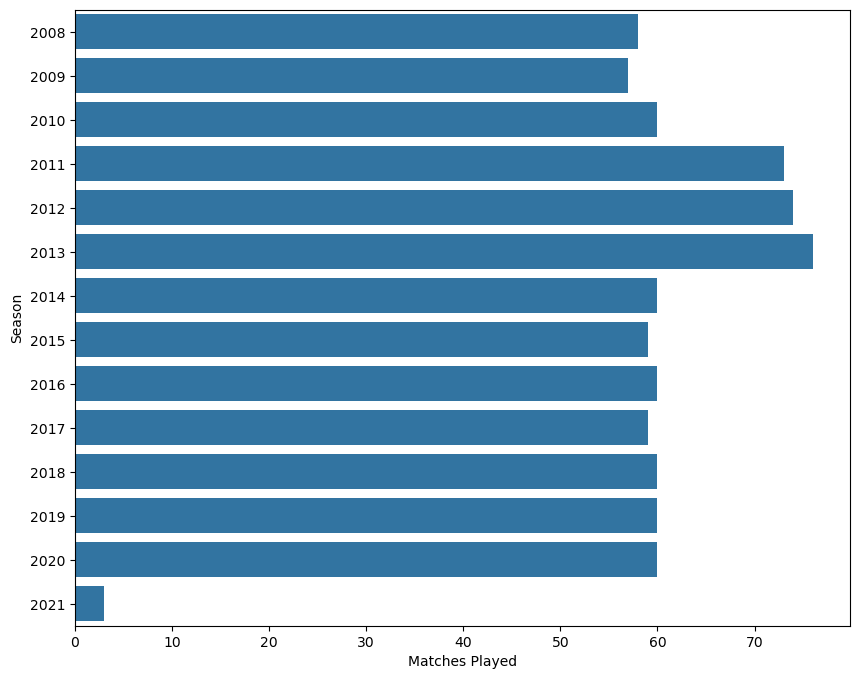

In [7]:
plt.figure(figsize=(10,8))
data=df.groupby(['match_id','season']).count().index.droplevel(level=0).value_counts().sort_index()

sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Season')
plt.show()

In [8]:
#Most IPL matches played in a venue
df.groupby(['venue','match_id']).count().index.droplevel(level=1).value_counts()

venue
M.Chinnaswamy Stadium                                   80
Eden Gardens                                            77
Arun Jaitley Stadium                                    74
Wankhede Stadium, Mumbai                                74
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk, Chennai                59
Punjab Cricket Association IS Bindra Stadium, Mohali    56
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     13
SuperSport Park                                   

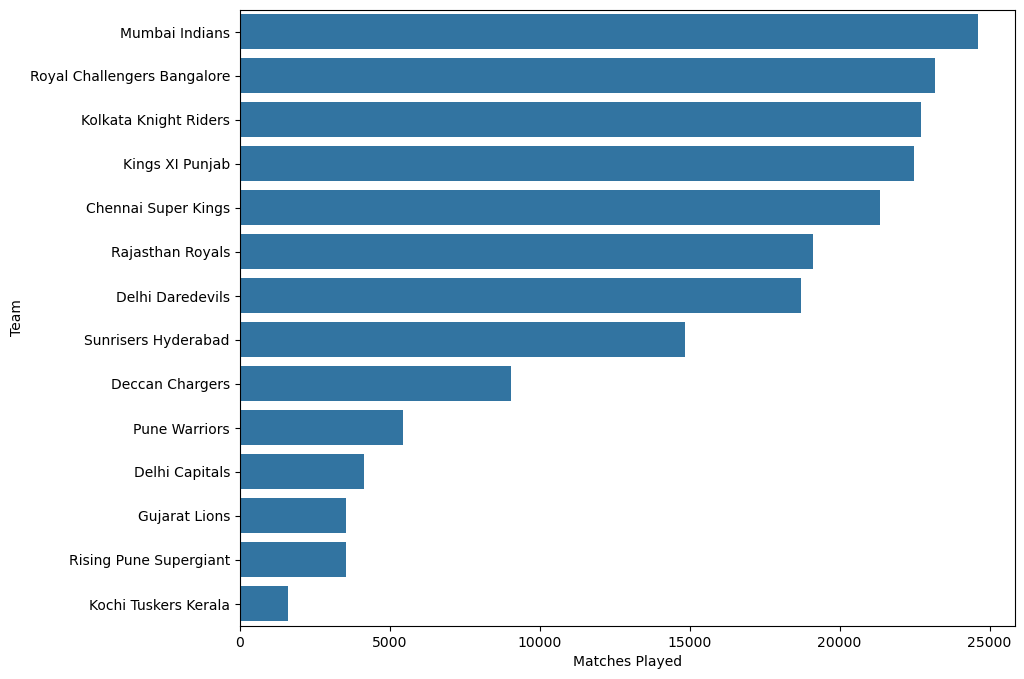

In [9]:
#IPL Matches Played by each team
plt.figure(figsize=(10,8))
data=df['bowling_team'].value_counts().sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Team')
plt.show()

In [10]:
#most runs scored by ipl teams
df.groupby(['batting_team'])['run'].sum().sort_values(ascending=False)

batting_team
Mumbai Indians                 32488
Royal Challengers Bangalore    30415
Kings XI Punjab                30064
Kolkata Knight Riders          29606
Chennai Super Kings            28560
Rajasthan Royals               24542
Delhi Daredevils               24296
Sunrisers Hyderabad            19539
Deccan Chargers                11463
Pune Warriors                   6358
Delhi Capitals                  5499
Gujarat Lions                   4862
Rising Pune Supergiant          4533
Kochi Tuskers Kerala            1901
Name: run, dtype: int64

In [23]:
df[df['runs_off_bat']==6].groupby(['start_date','striker']).count()['season'].sort_values(ascending=False)[:10]

start_date  striker       
2013-04-23  CH Gayle          17
2008-04-18  BB McCullum       13
2012-05-17  CH Gayle          13
2015-05-06  CH Gayle          12
2016-05-14  AB de Villiers    12
2010-04-03  M Vijay           11
2018-04-19  CH Gayle          11
2018-04-10  AD Russell        11
2008-05-14  ST Jayasuriya     11
2018-04-27  SS Iyer           10
Name: season, dtype: int64

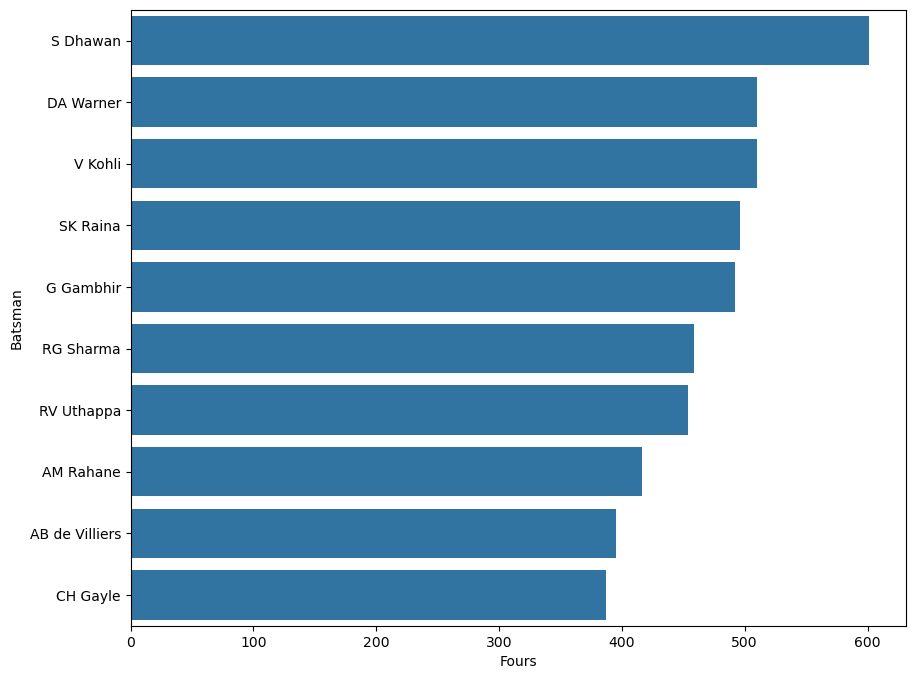

In [22]:
#most boundry (4s) hit by a batsman
plt.figure(figsize=(10,8))
data=df[df['runs_off_bat']==4]['striker'].value_counts()[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Fours')
plt.ylabel('Batsman')
plt.show()

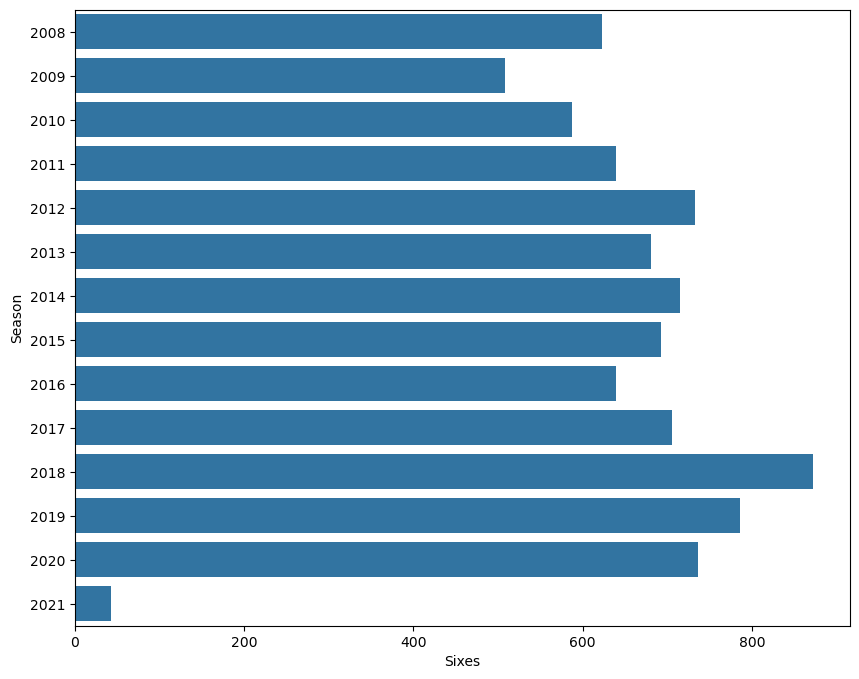

In [21]:
#no of sixes in IPL Seasons
plt.figure(figsize=(10,8))
data=df[df['runs_off_bat']==6].groupby('season').count()['match_id'].sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Sixes')
plt.ylabel('Season')
plt.show()

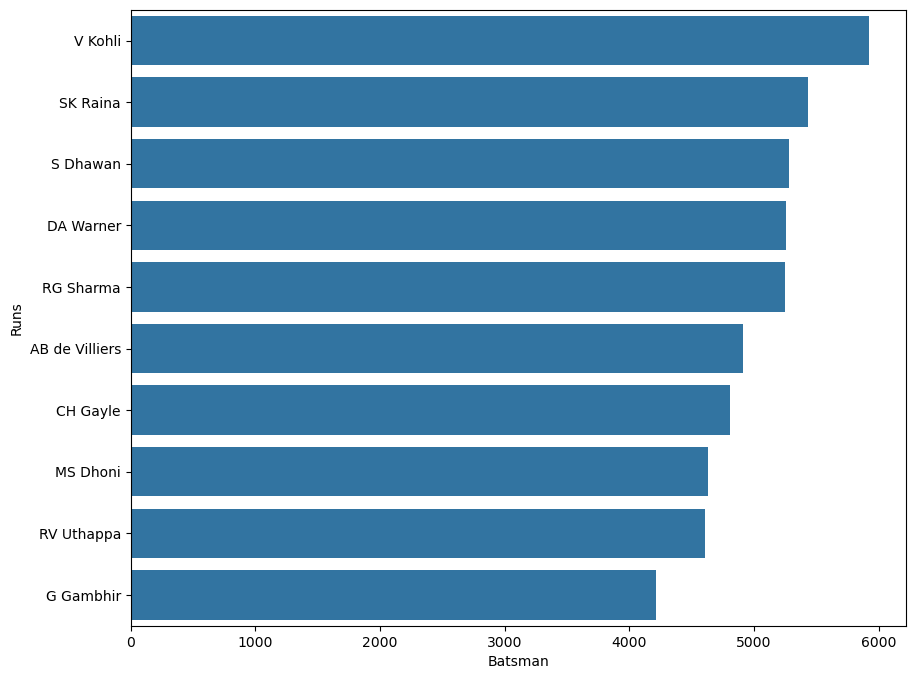

In [11]:
#most ipl runs by a batsman
plt.figure(figsize=(10,8))
data=df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.show()

In [12]:
#avg run by teams in powerplay
df[df['over']<6].groupby(['match_id','batting_team']).sum()['run'].groupby('batting_team').mean().sort_values(ascending=False)[2:]

batting_team
Delhi Capitals                 48.176471
Sunrisers Hyderabad            47.856000
Rising Pune Supergiant         47.433333
Kings XI Punjab                47.126316
Kolkata Knight Riders          46.409326
Delhi Daredevils               45.714286
Deccan Chargers                45.560000
Mumbai Indians                 45.529412
Chennai Super Kings            45.195531
Rajasthan Royals               44.912500
Royal Challengers Bangalore    44.826531
Pune Warriors                  42.111111
Name: run, dtype: float64

In [13]:
#most ipl century by a player
runs=df.groupby(['striker','match_id'])['runs_off_bat'].sum()
runs[runs>=100].droplevel(level=1).groupby('striker').count().sort_values(ascending=False)[:10]

striker
CH Gayle          6
V Kohli           5
DA Warner         4
SR Watson         4
AB de Villiers    3
HM Amla           2
M Vijay           2
KL Rahul          2
SV Samson         2
S Dhawan          2
Name: runs_off_bat, dtype: int64

In [14]:
#highest individual IPL score
df.groupby(['striker','start_date'])['runs_off_bat'].sum().sort_values(ascending=False)[:10]

striker         start_date
CH Gayle        2013-04-23    175
BB McCullum     2008-04-18    158
AB de Villiers  2015-05-10    133
KL Rahul        2020-09-24    132
AB de Villiers  2016-05-14    129
CH Gayle        2012-05-17    128
RR Pant         2018-05-10    128
M Vijay         2010-04-03    127
DA Warner       2017-04-30    126
V Sehwag        2014-05-30    122
Name: runs_off_bat, dtype: int64

In [15]:
#most run conceded by a bowler in an inning
df.groupby(['bowler','start_date'])['run'].sum().droplevel(level=1).sort_values(ascending=False)[:10]  

bowler
Basil Thampi        70
Sandeep Sharma      66
Mujeeb Ur Rahman    66
I Sharma            66
PJ Cummins          65
UT Yadav            65
AS Rajpoot          64
S Kaul              64
AB Dinda            63
TA Boult            63
Name: run, dtype: int64

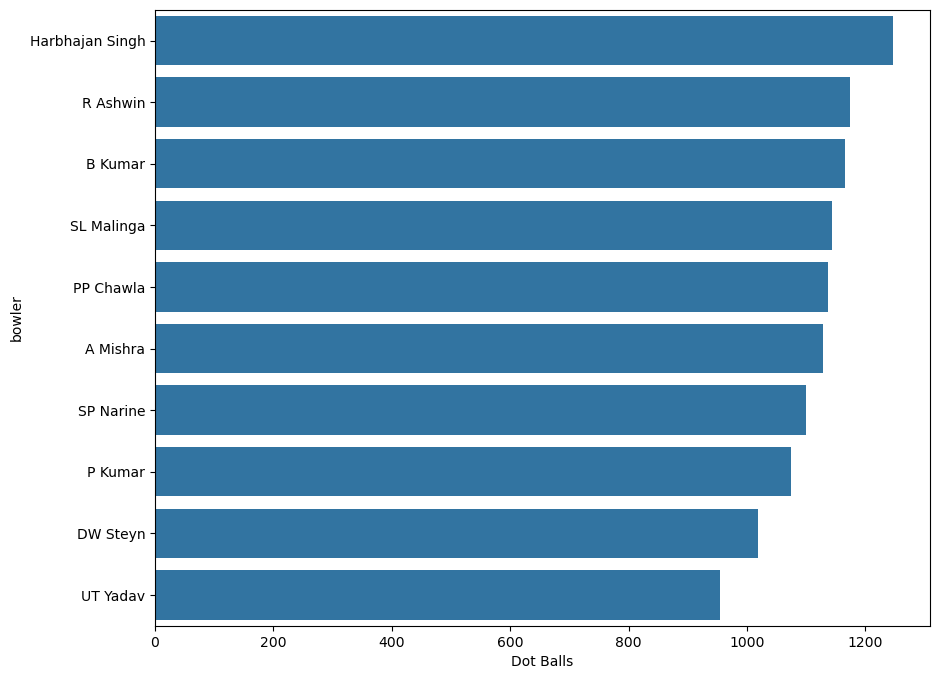

In [16]:
#most dot ball by a bowler
plt.figure(figsize=(10,8))
data=df[df['run']==0].groupby('bowler').count()['match_id'].sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Dot Balls')
plt.ylabel('bowler')
plt.show()

In [17]:
#most ipl wickets by a bowler
lst='caught,bowled,lbw,stumped,caught and bowled,hit wicket'
df[df['wicket_type'].apply(lambda x:True if x in lst and x !=' ' else False)]['bowler'].value_counts()[:10]

bowler
SL Malinga         170
A Mishra           160
PP Chawla          156
DJ Bravo           154
Harbhajan Singh    150
R Ashwin           139
B Kumar            137
SP Narine          127
YS Chahal          121
UT Yadav           119
Name: count, dtype: int64

In [18]:
 #maiden over by a bowler
data=df.groupby(['start_date','bowler','over'])['run'].sum()
data=data[data.values==0].droplevel(level=[0,2])
data.index.value_counts()[:10]

bowler
P Kumar           12
IK Pathan          9
SL Malinga         8
DW Steyn           8
B Kumar            7
DS Kulkarni        7
Sandeep Sharma     6
DJ Bravo           6
R Ashwin           5
Z Khan             5
Name: count, dtype: int64

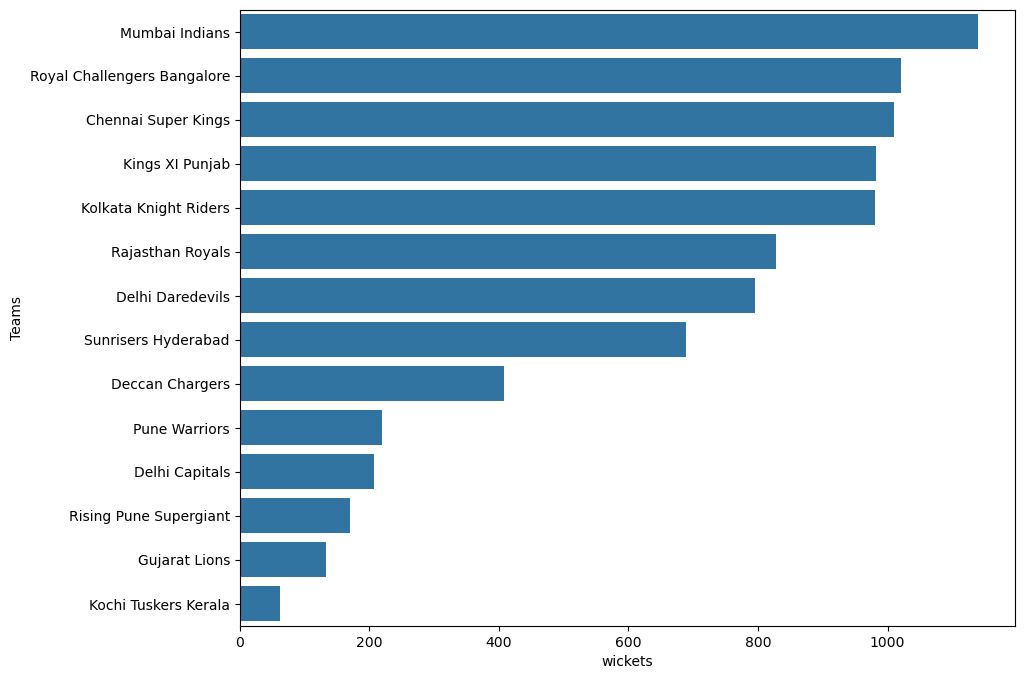

In [19]:
#most wickets by an IPL team
plt.figure(figsize=(10,8))
lst='caught,bowled,lbw,stumped,caught and bowled,hit wicket'
data=df[df['wicket_type'].apply(lambda x: True if x in lst and x !=' ' else False)]['bowling_team'].value_counts()
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('wickets')
plt.ylabel('Teams')
plt.show()

In [20]:
#most no balls by an ipl team
df.groupby(['batting_team'])['noballs'].agg('sum').sort_values(ascending=False)

batting_team
Royal Challengers Bangalore    106.0
Chennai Super Kings             96.0
Mumbai Indians                  96.0
Rajasthan Royals                94.0
Kolkata Knight Riders           90.0
Delhi Daredevils                73.0
Kings XI Punjab                 71.0
Sunrisers Hyderabad             53.0
Deccan Chargers                 49.0
Pune Warriors                   24.0
Delhi Capitals                  21.0
Gujarat Lions                   17.0
Kochi Tuskers Kerala            11.0
Rising Pune Supergiant           8.0
Name: noballs, dtype: float64